In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/home/powerconsumption - novo.csv')
df.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 00:00,6.559,73.8,83.00,51.00,119.0,340.556.962,1.612.887.538,2.024.096.386
1,1/1/2017 00:10,6.414,74.5,83.00,0.07,85.0,2.981.468.354,1.937.507.599,2.013.108.434
2,1/1/2017 00:20,6.313,74.5,0.08,62.00,0.1,2.912.810.127,1.900.668.693,1.966.843.373
3,1/1/2017 00:30,6.121,75.0,83.00,91.00,96.0,2.822.886.076,1.836.109.422,1.889.927.711
4,1/1/2017 00:40,5.921,75.7,81.00,48.00,85.0,273.356.962,1.787.234.043,1.844.240.964


# **EX1**
Cria uma variável de classificação indicando se o consumo na zona 1 é baixo
ou alto em uma determinada observação. Para isso, separe os registros
utilizando o percentil 50%. Caso o balanceamento não esteja perfeito,
lembre-se de balancear a base (3 pontos).


In [ ]:
df1 = df.copy()

In [ ]:
#Deletando colunas que não serão utilizadas
del df1['Datetime']
del df1['GeneralDiffuseFlows']
del df1['DiffuseFlows']
del df1['PowerConsumption_Zone2']
del df1['PowerConsumption_Zone3']
df1.head(2)


,Temperature,Humidity,WindSpeed,PowerConsumption_Zone1
0,6.559,73.8,83.0,340.556.962
1,6.414,74.5,83.0,2.981.468.354


In [ ]:
#checando o tipo das colunas
df1.dtypes

,0
Temperature,float64
Humidity,float64
WindSpeed,float64
PowerConsumption_Zone1,object


In [ ]:
#Alterando para float
df1['PowerConsumption_Zone1'] = df1['PowerConsumption_Zone1'].str.replace('.', '').astype(float)
df1

,Temperature,Humidity,WindSpeed,PowerConsumption_Zone1
0,6.559,73.8,83.00,3.405570e+08
1,6.414,74.5,83.00,2.981468e+09
2,6.313,74.5,0.08,2.912810e+09
3,6.121,75.0,83.00,2.822886e+09
4,5.921,75.7,81.00,2.733570e+08
...,...,...,...,...
52411,7.010,72.4,0.08,3.116046e+09
52412,6.947,72.6,82.00,3.043042e+09
52413,6.900,72.8,86.00,2.959087e+09
52414,6.758,73.0,0.08,2.895817e+08


In [ ]:
#Separando a base do consumo de energia, utilizando o percentil
p50 = np.percentile(df1['PowerConsumption_Zone1'], 50)

In [ ]:
#Separando as classes entre 0 ou 1
df1['class'] = df1.apply(lambda row: 1 if row['PowerConsumption_Zone1'] > p50 else 0, axis=1)


In [ ]:
df1['class'].value_counts()

,count
class,
0,26209
1,26207


In [ ]:
#Balanciando a classificação
df_class_0 = df1[df1['class'] == 0].sample(n=26207, random_state=42)
df_class_1 = df1[df1['class'] == 1].sample(n=26207, random_state=42)

df1 = pd.concat([df_class_0, df_class_1])

In [ ]:
df1['class'].value_counts()

,count
class,
0,26207
1,26207


# **EX2**
Crie um modelo preditivo utilizando uma árvore de decisão (DecisionTree)
para prever a classificação criada no item anterior. Ajuste os hiperparâmetros
disponíveis para o modelo para ter a melhor acurácia possível. Imprima a
matriz de confusão e comente os resultados. Imprima o classification_report
do seu modelo e comente as métricas f1-score, precision, recall, e accuracy.
Todas as métricas devem ser obtidas a partir da base de teste (4 pontos).

In [ ]:
#Modelo preditivo utilizando uma árvore de decisão (DecisionTree)
x = df1.drop(['class', 'PowerConsumption_Zone1'], axis=1)
y = df1['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=42)

from sklearn import metrics
accuracies = []
for max_depth in range(1, 11):
  regressor = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=20, max_depth=max_depth, random_state=42)
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_test)

  accuracy = metrics.accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  print(f'Max Depth: {max_depth}, Accuracy: {accuracy:.4f}')

Max Depth: 1, Accuracy: 0.6323
Max Depth: 2, Accuracy: 0.6323
Max Depth: 3, Accuracy: 0.6373
Max Depth: 4, Accuracy: 0.6382
Max Depth: 5, Accuracy: 0.6436
Max Depth: 6, Accuracy: 0.6561
Max Depth: 7, Accuracy: 0.6610
Max Depth: 8, Accuracy: 0.6617
Max Depth: 9, Accuracy: 0.6669
Max Depth: 10, Accuracy: 0.6649


<Axes: >

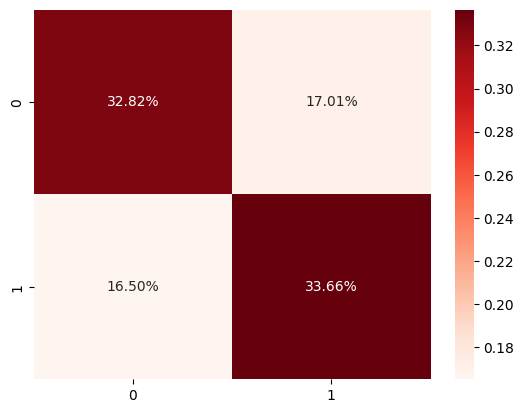

In [ ]:
#Plotando a matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = regressor.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')

Ao analizarmos a matriz de confusão percebemos que o resultado apresentado na matriz de confusão demonstra que o valor de precisão de 0,68 confirma um bom resultado de valor real. A qual teve uma acertividade de 32,82% para a classe 0 e 33,66% para a classe1.


In [ ]:
#Analizando métricas do modelo
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.66      0.66     13060
           1       0.66      0.67      0.67     13147

    accuracy                           0.66     26207
   macro avg       0.66      0.66      0.66     26207
weighted avg       0.66      0.66      0.66     26207



Na precision demostra que a classe 0, teve uma pequena vantagem para ter na acertividade nas predições positivas. Mas não muito relevante por ser pequena.

O resultado do Recall sugere que possui uma pequena vantagem para detectar essa classe 0, para conseguir identificar os verdadeiros positivos.

O F1- score parece que as classes estão quase balanceadas.

Acurácia, as classes não estão enviesadas.

# **EX3**
Faça uma Regressão Linear as variáveis Temperatura, Umidade e
Velocidade do vento. Seu modelo deve prever o consumo de energia na zona
1. Faça seu programa imprimir o R² obtido sobre a base de teste. (3 pontos)

In [ ]:
filtered_df = df1[(df1['WindSpeed'].notnull())]  # Crio o dataset filtrado sem valores nulos
print(filtered_df.shape)# Printando o tamanho para realizar a divisao da base de treino e teste (agora sem nulos)

(34044, 5)


In [ ]:
# Dividir minha base total em teste e treino
df1_train = filtered_df.sample(17023)

# retiro da base principal as observações que utilizo na base de treino
df1_test = filtered_df.drop(df1_train.index)

In [ ]:
# Criei minhas variáveis de treino para PowerConsumption_Zone1 (Regressao principal)
x_train = df1_train[['Temperature','Humidity','WindSpeed']].to_numpy()
y_train = df1_train['PowerConsumption_Zone1'].to_numpy()

# Criei minhas variáveis de teste para PowerConsumption_Zone1 (Regressao principal)
x_test = df1_test[['Temperature','Humidity','WindSpeed']].to_numpy()
y_test = df1_test['PowerConsumption_Zone1'].to_numpy()


In [ ]:
# Criei meu modelo de Regressão Linear para PowerConsumption_Zone1 (Regressao principal)
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
score_linear = model_linear.score(x_test, y_test)
score_linear

0.055892975001920475

# **EX4**
A coluna WindSpeed possui valores nulos. Com base nas demais
informações, reconstrua os valores da coluna WindSpeed. Faça uma nova
regressão linear com os dados sintéticos e compare com o R² do item 3.
Houve melhora desse indicador (4 pontos)?

In [ ]:
# Verifico quais campos possui nulos e sua quantidade
df1.isnull().sum()

,0
Temperature,0
Humidity,0
WindSpeed,18370
PowerConsumption_Zone1,0
class,0


In [ ]:
# Criei minhas variáveis x e y para a regressao de 'WindSpeed'
x = df1[['Temperature','Humidity']].to_numpy()
y = df1['WindSpeed'].to_numpy()

In [ ]:
# Criei meu modelo de Regressão Linear para 'WindSpeed'
filtered_df = df1[(df1['WindSpeed'].notnull())]
x = filtered_df[['Temperature','Humidity']].to_numpy()
y = filtered_df['WindSpeed'].to_numpy()
model_linear = LinearRegression()
model_linear.fit(x, y)
score_linear_WindSpeed = model_linear.score(x, y)
score_linear_WindSpeed

0.008000391105508986

In [ ]:
# Crio uma funcao que realizara o calculo para criar dados sinteticos para o campo 'WindSpeed', criando um novo campo 'novo_WindSpeed' agora sem valores nulos
def completar_windSpeed(row):
  if pd.isna(row['WindSpeed']):
    campos = row[['Temperature','Humidity']]
    return round(model_linear.predict([campos])[0])
  return row['WindSpeed']
df1['novo_WindSpeed'] = df1.apply(completar_windSpeed, axis=1)
df1

,Temperature,Humidity,WindSpeed,PowerConsumption_Zone1,class,novo_WindSpeed
19350,19.05,74.30,NaN,3.082072e+09,0,79.00
19179,20.93,48.93,0.08,2.321626e+08,0,0.08
9457,17.34,56.41,75.00,3.116528e+08,0,75.00
22228,20.45,83.00,72.00,2.296371e+09,0,72.00
3217,8.85,81.70,82.00,2.518481e+09,0,82.00
...,...,...,...,...,...,...
40174,18.67,60.65,NaN,3.260009e+09,1,79.00
11358,13.91,71.40,88.00,4.349413e+09,1,88.00
1956,16.44,62.05,84.00,3.347848e+09,1,84.00
30384,23.06,64.52,NaN,3.991814e+09,1,83.00


In [ ]:
# Apagando meu campo 'WindSpeed' do dataset principal
df1 = df1.drop(['WindSpeed'], axis=1)
isnull = df1.isnull().sum()
print(isnull)

Temperature               0
Humidity                  0
PowerConsumption_Zone1    0
class                     0
novo_WindSpeed            0
dtype: int64


In [ ]:
# Printando o tamanho para realizar a divisao da base de treino e teste (agora sem nulos)
print(df1.shape)

(52414, 5)


In [ ]:
# Dividir minha base total em teste e treino
df1_train = df1.sample(26208)

# retiro da base principal as observações que utilizo na base de treino
df1_test = df1.drop(df1_train.index)


In [ ]:
# Criei minhas variáveis de treino para PowerConsumption_Zone1 com o novo campo 'novo_WindSpeed'
x_train = df1_train[['Temperature','Humidity','novo_WindSpeed']].to_numpy()
y_train = df1_train['PowerConsumption_Zone1'].to_numpy()

# Criei minhas variáveis de teste para PowerConsumption_Zone1 com o novo campo 'novo_WindSpeed'
x_test = df1_test[['Temperature','Humidity','novo_WindSpeed']].to_numpy()
y_test = df1_test['PowerConsumption_Zone1'].to_numpy()

In [ ]:
# Criei meu modelo de Regressão Linear para PowerConsumption_Zone1 com o novo campo 'novo_WindSpeed'
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
score_linear = model_linear.score(x_test, y_test)
score_linear

0.06949404015473282

**Resposta:** Houve uma melhora na Regressao linear pos Reconstrucao de informacao (0.069) em relacao a Regressao principal (0.055).